In [46]:
# https://www.tensorflow.org/tutorials/keras/classification

In [47]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

######

from tensorflow.python.client import device_lib
print("#####################")
print("TF Available devices: ")
print(device_lib.list_local_devices())
print("#####################")
print("Tensorflow version: ",tf.__version__)
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")
    
assert tf.test.is_gpu_available()
assert tf.test.is_built_with_cuda()
######

#####################
TF Available devices: 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5770325793336275400
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9210949796
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14444833154877837023
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]
#####################
Tensorflow version:  2.0.0
Default GPU Device: /device:GPU:0


In [48]:
# Import the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [49]:
# train_images and train_labels are the training set
# test_images and test_labels are the test set

In [50]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [51]:
# 60,000 images in the training set, with each image represented as 28x28 pixels
train_images.shape

(60000, 28, 28)

In [52]:
# 60,000 labels in the training set
len(train_labels)

60000

In [53]:
# showing that each label is an int between 0 and 9
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [54]:
#test set contains 10,000 image labels, with each image represented as 28x28 pixels
test_images.shape
len(test_labels)

10000

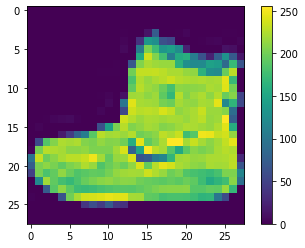

In [55]:
# preprocess - pixel values fall in the range of 0 to 255

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [56]:
# scale values to 0-1 before feeding into model
    # process the train/test set the same way
train_images = train_images / 255.0

test_images = test_images / 255.0

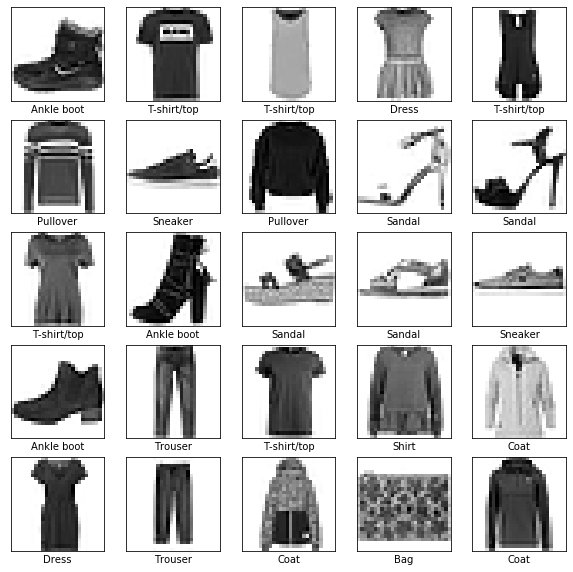

In [57]:
# verify that data is in the correct format, display first 25 images from train set + display the class name below each image
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [58]:
# Build model and setup layers

In [59]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
        # transform the format of the images from 2-d array to 1-d array
            #28x28 ----> 28*28=784 pixels
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
        # last layer is 10-node softmax layer that returns an array of 10 probability scores that sum to 1 
])

In [60]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# loss function - This measures how accurate the model is during training
# Optimizer - This is how the model is updated based on the data it sees and its loss function.
# Metrics - Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [61]:
# Train the model 
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.4927 - accuracy: 0.8264
Epoch 2/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3740 - accuracy: 0.8656
Epoch 3/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3376 - accuracy: 0.8771
Epoch 4/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3121 - accuracy: 0.8848
Epoch 5/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2943 - accuracy: 0.8916
Epoch 6/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2811 - accuracy: 0.8962
Epoch 7/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2672 - accuracy: 0.9007
Epoch 8/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2574 - accuracy: 0.9043
Epoch 9/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2461 - accuracy: 0.9086
Epoch 10/10
60

In [62]:
# Evaluate Accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 0.2941 - accuracy: 0.8808

Test accuracy: 0.8808


In [63]:
# Make predictions
predictions = model.predict(test_images)
    # array of 10 numbers representing the model's confidence that the image corresponds to each 
    # of the 10 different articles of clothing
predictions[0]
    # ^ label with the higest confidence value
    
    

array([3.3234993e-09, 2.7163742e-11, 1.8529708e-08, 7.5899590e-12,
       1.6301305e-08, 3.6002079e-05, 8.5000437e-08, 5.5599180e-03,
       4.2377477e-12, 9.9440396e-01], dtype=float32)

In [64]:
label_with_highest_conf = np.argmax(predictions[0])
label_with_highest_conf

9

In [65]:
# class_names[9]
class_names[label_with_highest_conf]

'Ankle boot'

In [66]:
# Examine test label to check if classification is correct:
test_labels[0]

9

In [67]:
# Graph the above to look at the full set of 10 class predictions

In [68]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

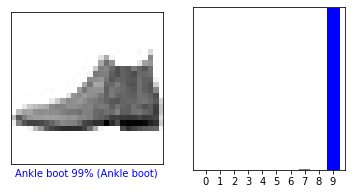

In [69]:
# example 0th image/predictions/prediction array
    # blue = correct prediction label
    # red = incorrect prediction label
    # number gives the percentage out of 100 for the predicted label
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

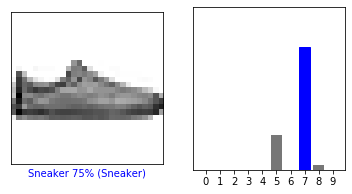

In [70]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

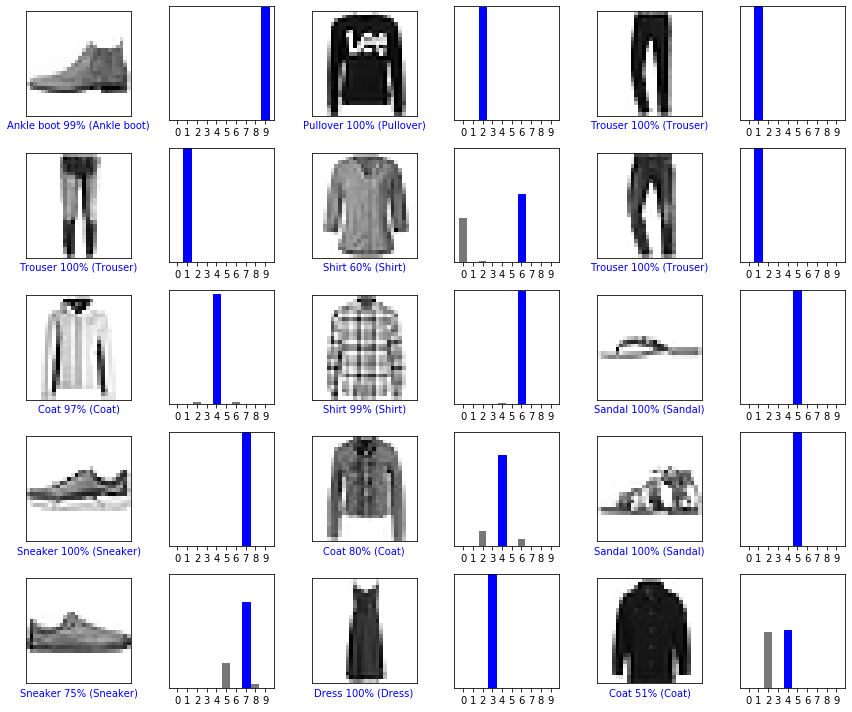

In [71]:
# Plot several images with their predictions

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [72]:
# Use trained model to make a prediction about a single image
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [73]:
# tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. 
    # even though you're using a single image, you need to add it to a list:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [74]:
# predict correct label for this image:
predictions_single = model.predict(img)

print(predictions_single)

[[2.1263071e-04 4.2779784e-15 9.9863619e-01 6.5798367e-10 8.0464780e-04
  1.0627175e-09 3.4656946e-04 1.8511667e-13 1.1898587e-08 3.1430828e-14]]


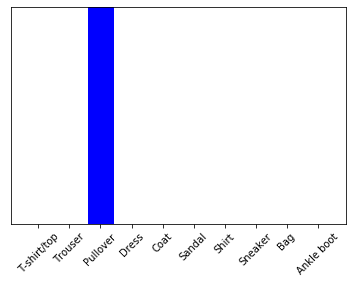

In [75]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [76]:
# model.predict returns a list of lists—one list for each image in the batch of data. 
#Grab the predictions for our (only) image in the batch:
np.argmax(predictions_single[0])
    # model predicts a label as expected 

2